In [1]:
# importing the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
df = pd.read_csv('day.csv')

# Reading and Inspecting the dataset

In [3]:
# reading the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Size of database
print('-'*100)
print("Size of Database:",df.size)
print('-'*100)
# Number of Rows and Columns in database
print("dimension of Database  :",df.shape)
print('-'*100)

----------------------------------------------------------------------------------------------------
Size of Database: 11680
----------------------------------------------------------------------------------------------------
dimension of Database  : (730, 16)
----------------------------------------------------------------------------------------------------


In [5]:
# Inspecting statistical summaries of the numeric variables
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking for missing values
print(df.isnull().sum())
print('-'*100)
print(df.info())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    

#### Insight: The dataset consists of 730 rows and 16 columns and doesn't have anly missing values

# Converting Back Data

In [7]:
# renaming the column heads in proper format for better understanding
df1 = df.rename(columns={'weathersit':'weather','yr':'year','mnth':'month','hr':'hour','hum':'humidity','cnt':'count','dteday':'date'})
df1.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01/01/2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Labelling the dataset as per data dictionary to make it more readable
name_dict = {"season" : {1:"spring", 2:"summer", 3:"fall", 4:"winter"}, 
             "weather" : {1: "Clear or Few Clouds", 2: "Mist and Cloudy", 3: "Light Snow/Rain", 4: "Heavy Snow/Rain"},
             "weekday" : {0: "Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"},
            "month" : {1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'},
            "year" : {0:'2018', 1:'2019'}}

for column in name_dict.keys():
    df1[column] = df1[column].apply(lambda x : name_dict[column][x])

In [9]:
df1.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01/01/2018,spring,2018,jan,0,Monday,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/2018,spring,2018,jan,0,Tuesday,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/2018,spring,2018,jan,0,Wednesday,1,Clear or Few Clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/2018,spring,2018,jan,0,Thursday,1,Clear or Few Clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/2018,spring,2018,jan,0,Friday,1,Clear or Few Clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# change format of columns from int to category
cols = ['season','month','holiday','weekday','workingday','weather',]

for col in cols:
    df1[col] = df1[col].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   date        730 non-null    object  
 2   season      730 non-null    category
 3   year        730 non-null    object  
 4   month       730 non-null    category
 5   holiday     730 non-null    category
 6   weekday     730 non-null    category
 7   workingday  730 non-null    category
 8   weather     730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  humidity    730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  count       730 non-null    int64   
dtypes: category(6), float64(4), int64(4), object(2)
memory usage: 62.7+ KB


# Exploratory Data Analysis

### Univariate analaysis

Text(0.5, 1.0, 'Monthly Usage of Bikes')

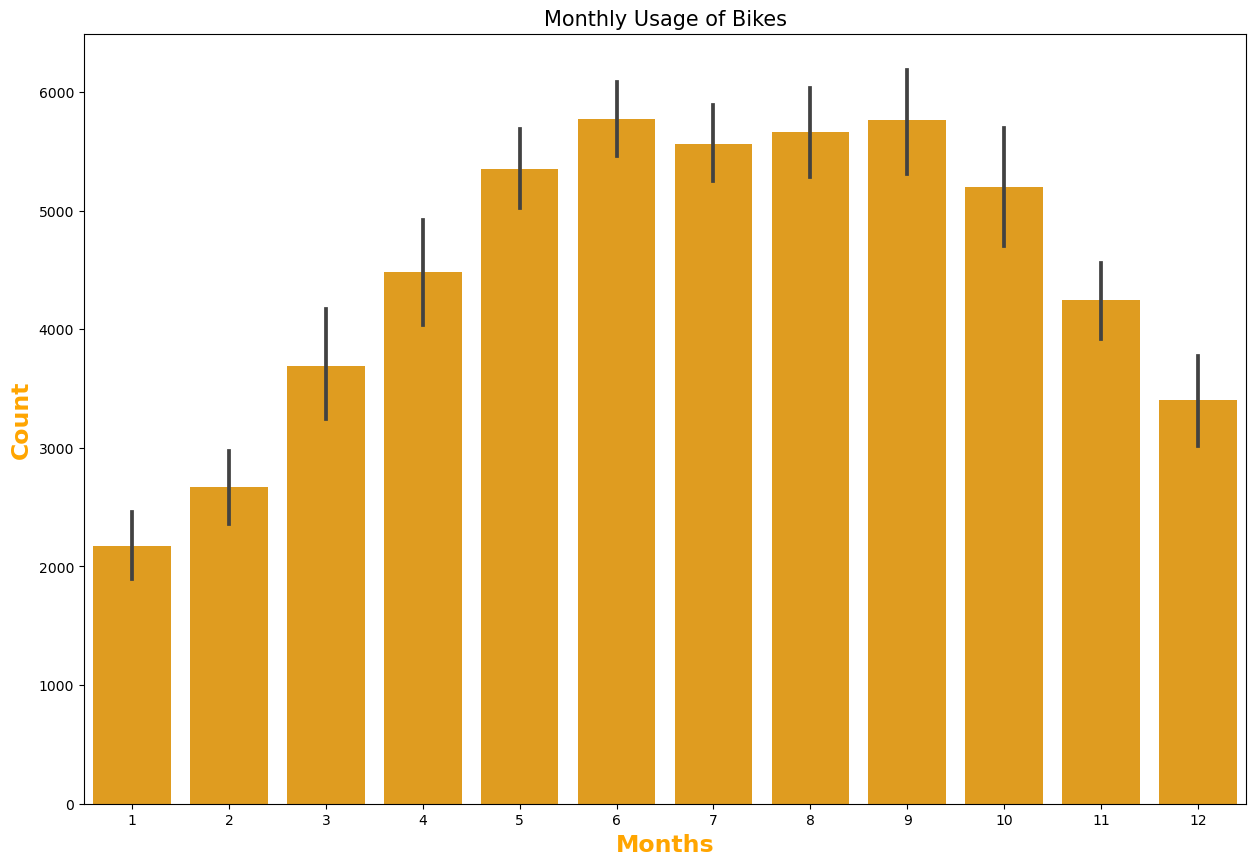

In [11]:
plt.subplots(figsize=(15,10))
sns.barplot(data=df, x='mnth', y='cnt',color = 'orange')
plt.xlabel('Months', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
plt.ylabel('Count', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
plt.title("Monthly Usage of Bikes",size= 15)

#### Findings: 
#### * The usage of bikes keeps increasing from January till June and starts falling from October 
#### *  The peak usage of bikes was in the months of June and August and the lowest was in January

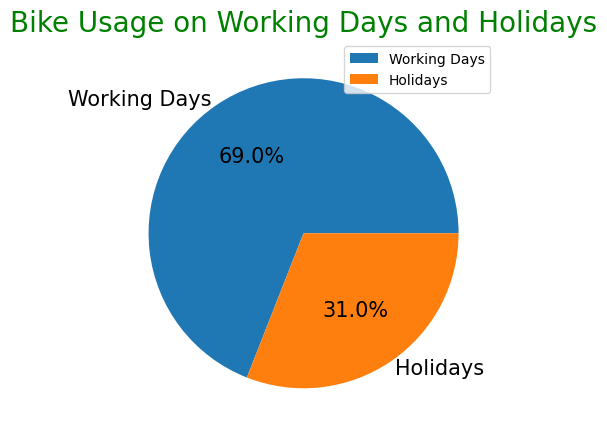

In [12]:
plt.figure(figsize=[5,7])
df1['workingday'].replace({1: 'Working Days', 0: 'Holidays'}).value_counts(normalize=True).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'}, labeldistance=1.05)
plt.title("Bike Usage on Working Days and Holidays", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.legend()
plt.ylabel("")
plt.xlabel("")
plt.show()

#### Findings: People use mmore bikes on working days than Non Working days

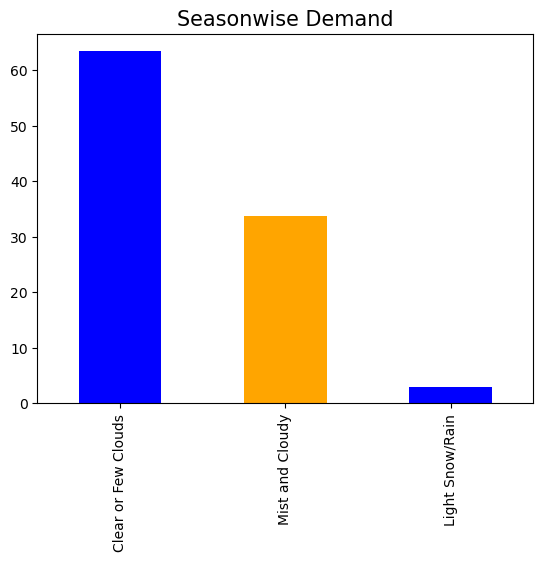

In [13]:
NAME_CONT= 100* df1.weather.value_counts(normalize=True)
NAME_CONT.plot.bar(color = ["blue","orange"])
plt.xticks(rotation=90)
plt.title("Seasonwise Demand",size= 15)
plt.show()

#### Findings: Bike demand is lowest during light snow or rainy weather because most people prefer to travel by car to avoid these conditions. Clear weather and few clouds mean that people use bikes more, thus resulting in higher demand during such times.

### Bi-Variate Analysis

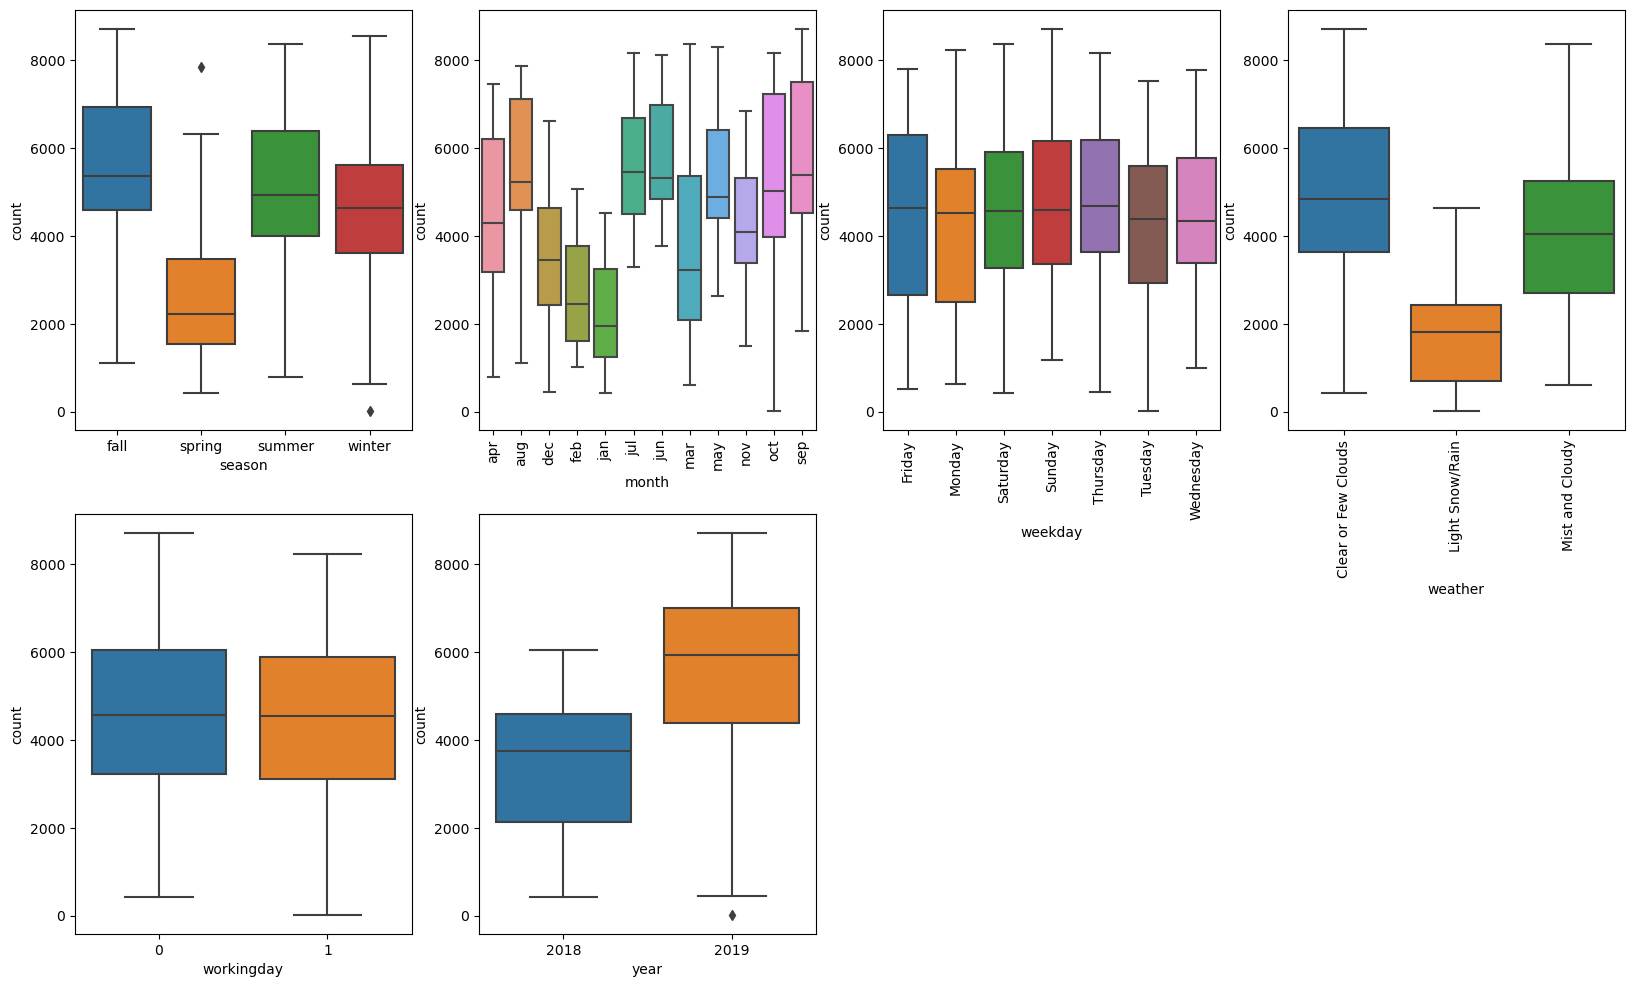

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = df1)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'count', data = df1)
plt.xticks(rotation = 90)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'count', data = df1)
plt.xticks(rotation = 90)
plt.subplot(2,4,4)
sns.boxplot(x = 'weather', y = 'count', data = df1)
plt.xticks(rotation = 90)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'count', data = df1)
plt.subplot(2,4,6)
sns.boxplot(x = 'year', y = 'count', data = df1)

plt.show()


<Figure size 640x480 with 0 Axes>

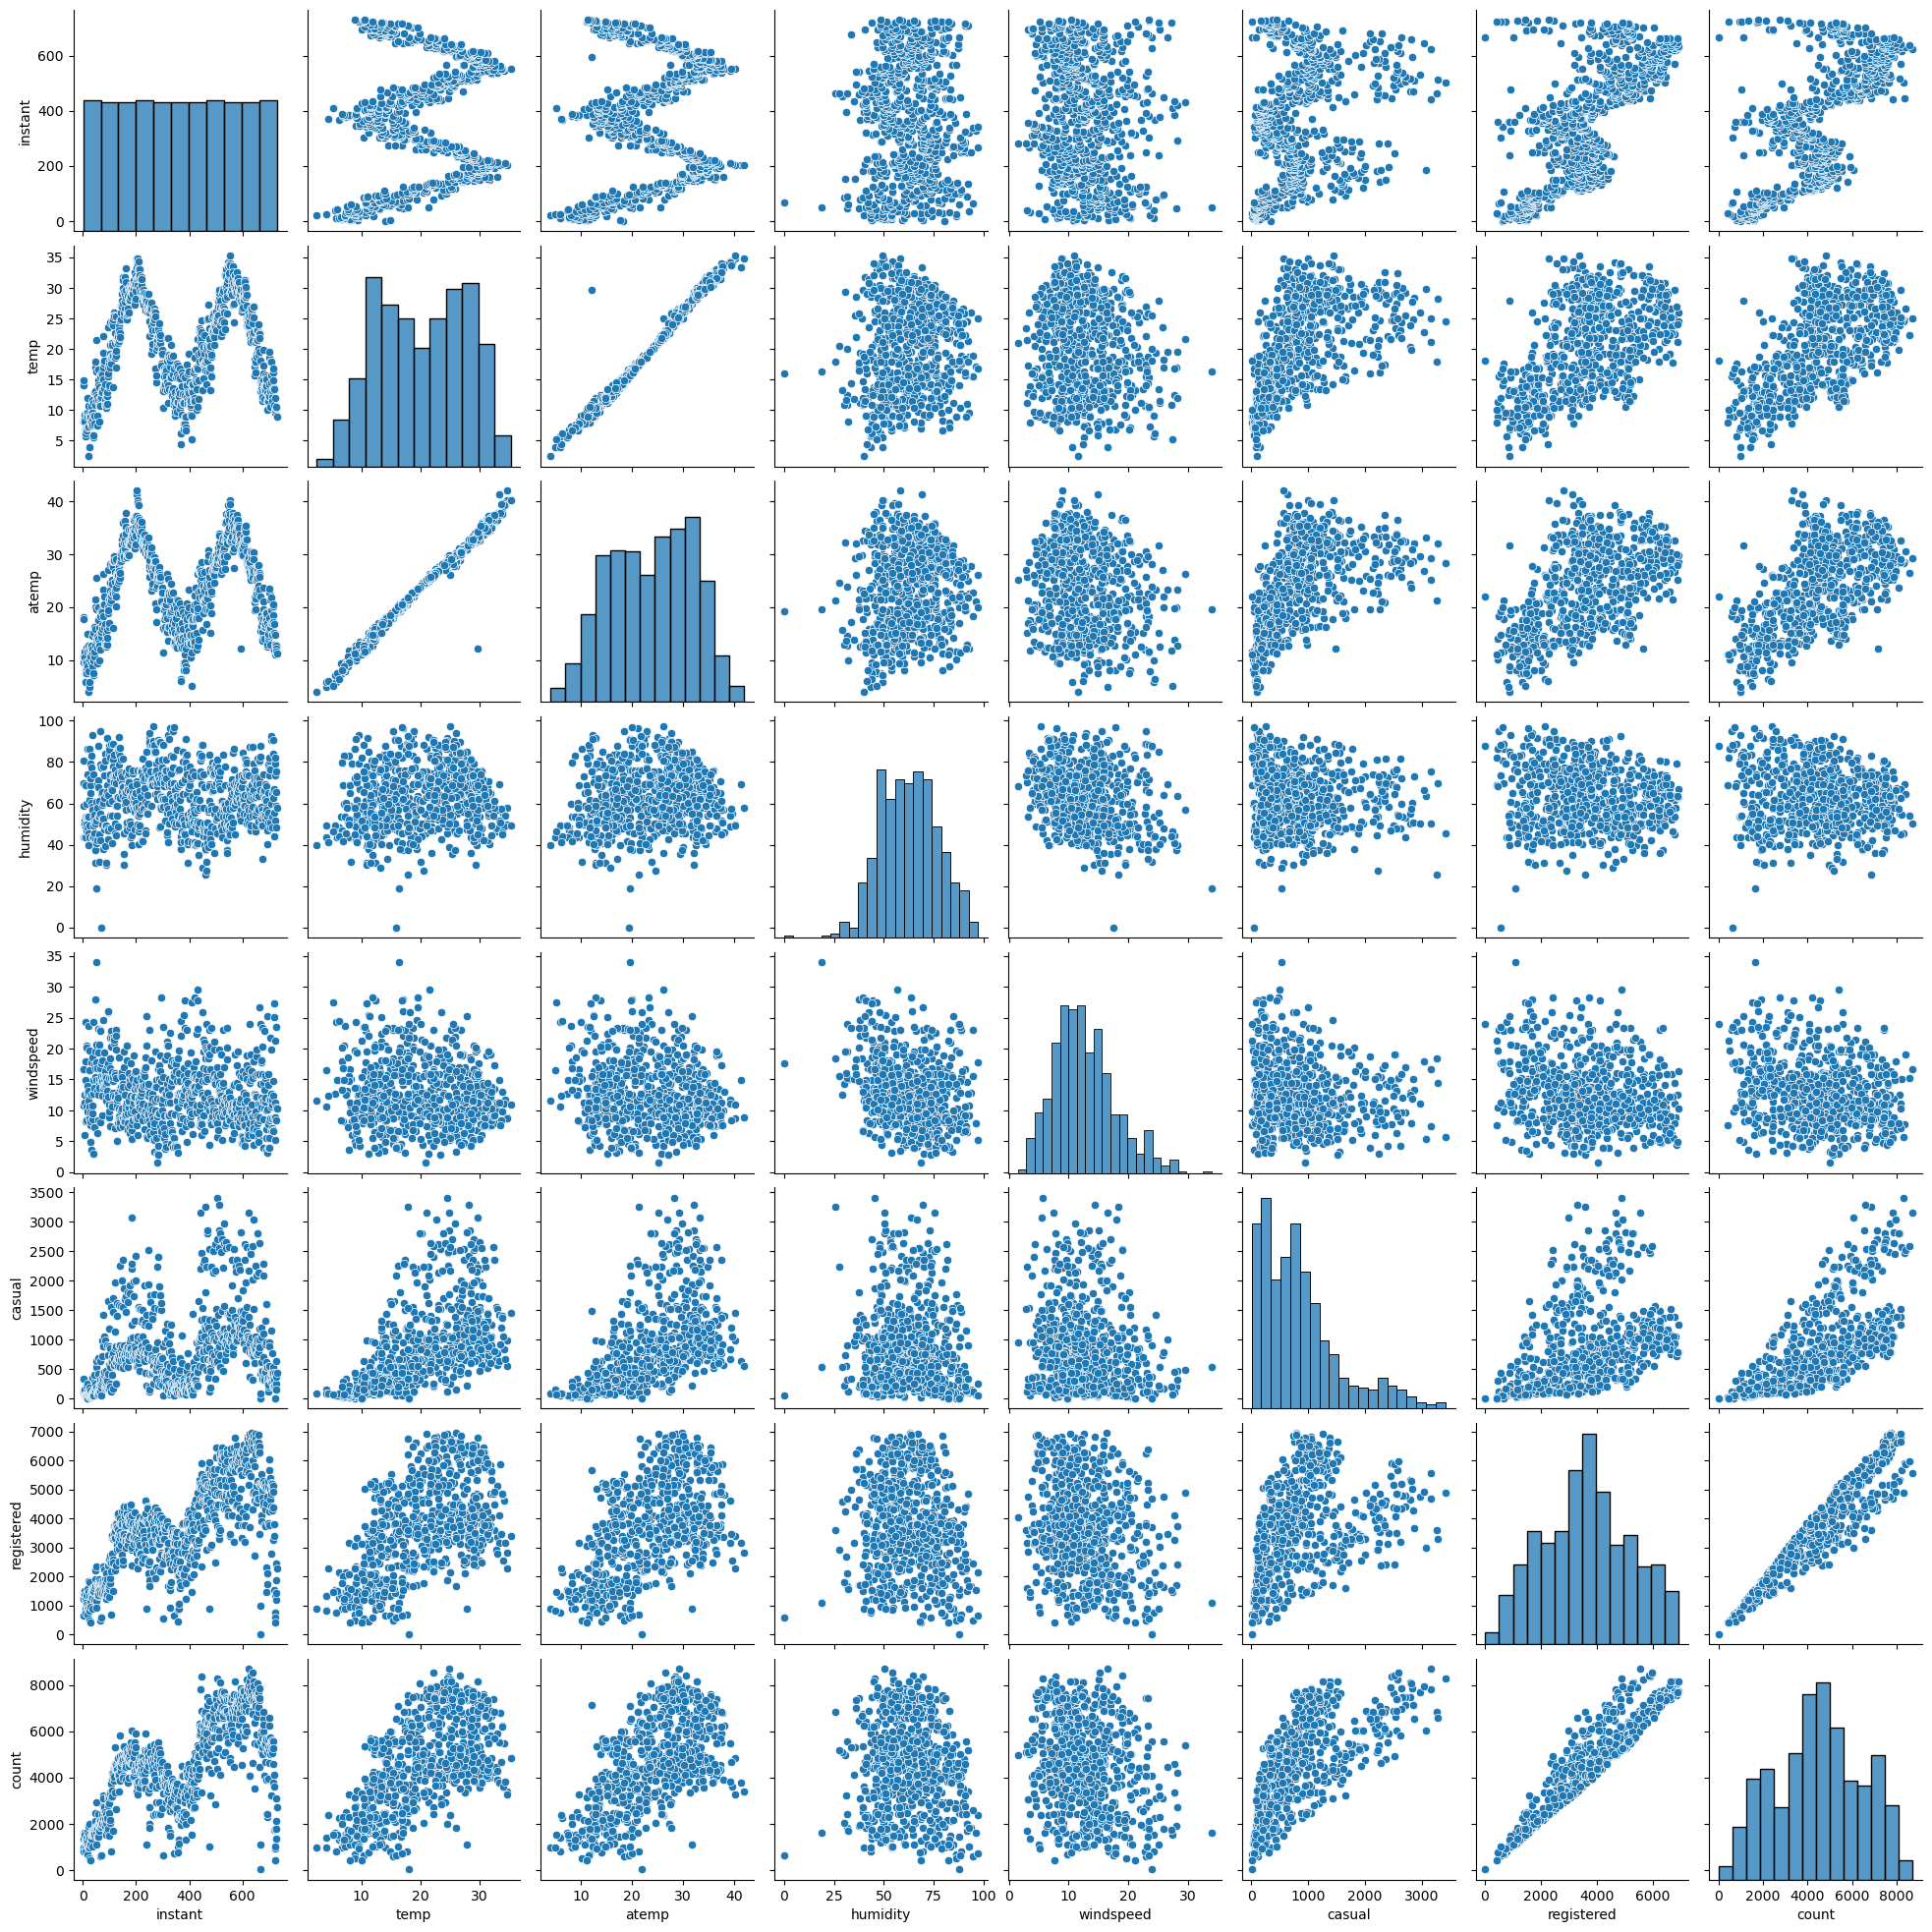

In [15]:
# Checking Co-relation 
plt.figure()
sns.pairplot(df1)
plt.show()

#### Findings: From the above pairplot we can tell that there is a Linear Relationship between temp, atemp and count.

<AxesSubplot:>

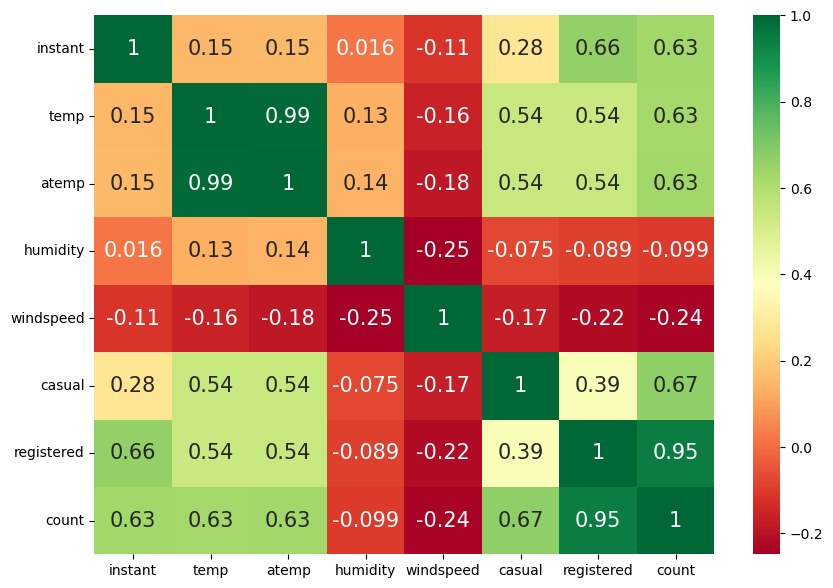

In [16]:
corr = df1.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True,cmap="RdYlGn", annot_kws={'size':15})

#### Finding:
#### * The columns 'temp' and 'atemp' are highly correlated so we can delete one of them as both represent the same pattern.
#### * We can also delete the columns 'casual' and 'registered' as their sum equals the value of the count variable in the dataset.

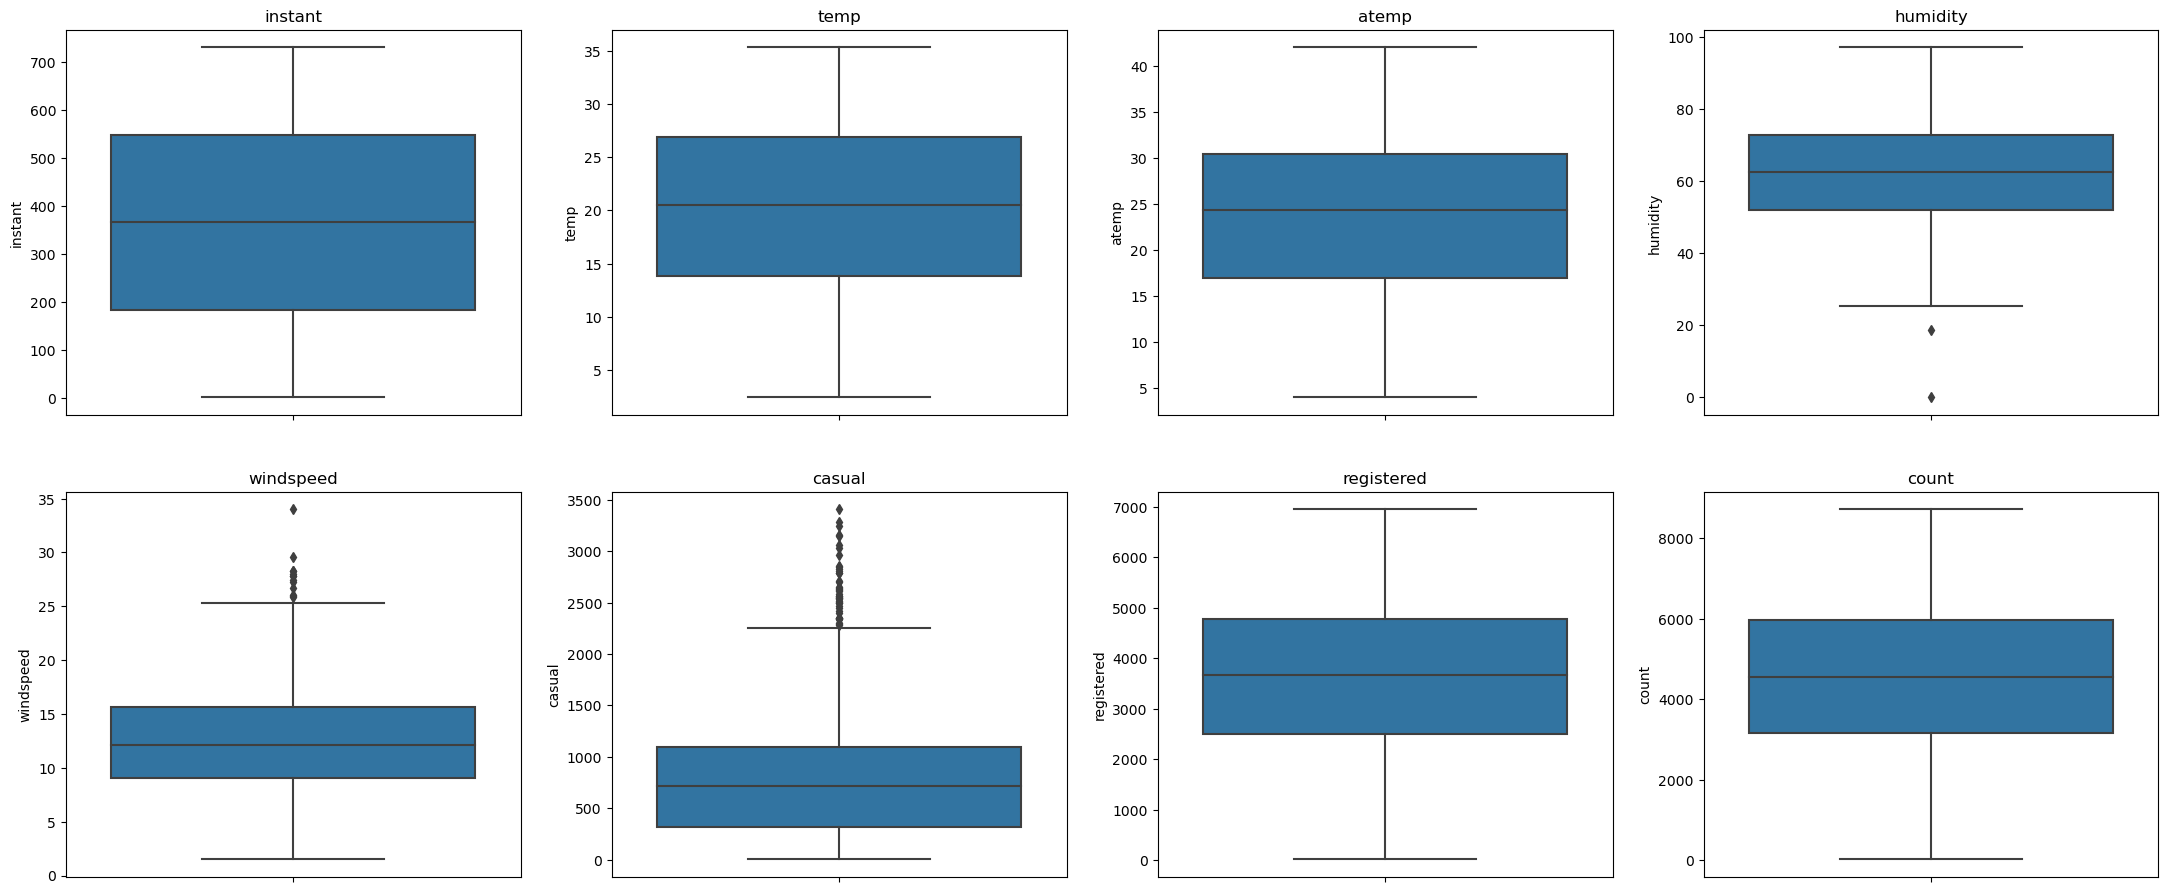

In [17]:
   plt.figure(figsize=(27,11))
previous_outlier = ["instant","temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]

for i in enumerate(previous_outlier):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=df1[i[1]])
    plt.title(i[1])


#### Findings : We can see that there are few outliers in Windspeed and Casual variables.

# Data Preparation

### Dropping unwanted columns.

In [18]:
columns_to_drop = ['instant', 'date','casual','registered','atemp']
df1 = df1.drop(columns_to_drop, axis=1)
df1.head()

,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,spring,2018,jan,0,Monday,1,Mist and Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,jan,0,Tuesday,1,Mist and Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,jan,0,Wednesday,1,Clear or Few Clouds,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,0,Thursday,1,Clear or Few Clouds,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,0,Friday,1,Clear or Few Clouds,9.305237,43.6957,12.522300,1600


### Creating Dummies

In [19]:
df1 = pd.get_dummies(df1, drop_first=True)
df1.info()
print('-'*100)
print("Number of rows and columns after creating dummies :",df1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temp                     730 non-null    float64
 1   humidity                 730 non-null    float64
 2   windspeed                730 non-null    float64
 3   count                    730 non-null    int64  
 4   season_spring            730 non-null    uint8  
 5   season_summer            730 non-null    uint8  
 6   season_winter            730 non-null    uint8  
 7   year_2019                730 non-null    uint8  
 8   month_aug                730 non-null    uint8  
 9   month_dec                730 non-null    uint8  
 10  month_feb                730 non-null    uint8  
 11  month_jan                730 non-null    uint8  
 12  month_jul                730 non-null    uint8  
 13  month_jun                730 non-null    uint8  
 14  month_mar                7

### Splitting into train and test

In [20]:
df_train, df_test = train_test_split(df1, train_size = 0.70, test_size = 0.30, random_state = 333)
print('size of train dataset:', df_train.shape)
print('-'*100)
print('size of test dataset:',df_test.shape)

size of train dataset: (510, 29)
----------------------------------------------------------------------------------------------------
size of test dataset: (219, 29)


### Rescalling of Variables

In [21]:
scaler = MinMaxScaler()
# list of numeric variables
num_vars = ['temp','humidity','windspeed','count']
# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_aug,month_dec,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weather_Light Snow/Rain,weather_Mist and Cloudy
483,0.497426,0.609956,0.194850,0.722734,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
650,0.416433,0.513852,0.255118,0.815347,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
212,0.887856,0.572294,0.276919,0.488265,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
714,0.378013,0.871429,0.161523,0.433042,0,0,1,1,0,1,...,0,1,0,0,0,0,0,1,0,1
8,0.098690,0.451083,0.700017,0.092039,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


# Model Building

In [22]:
# Dividing into X and Y sets
y_train = df_train.pop('count')
X_train = df_train

## RFE (Recursive Feature Elimination )

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [24]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns,'Ranking': rfe.ranking_,'Select Status': rfe.support_})
rfe_df.sort_values(by='Ranking')

,Predictor,Ranking,Select Status
0,temp,1,True
21,weekday_Sunday,1,True
20,weekday_Saturday,1,True
17,month_sep,1,True
15,month_nov,1,True
26,weather_Light Snow/Rain,1,True
11,month_jul,1,True
8,month_dec,1,True
13,month_mar,1,True
27,weather_Mist and Cloudy,1,True


In [25]:
# selecting the variables from RFE list
col = X_train.columns[rfe.support_]
print(col)

Index(['temp', 'humidity', 'windspeed', 'season_spring', 'season_winter',
       'year_2019', 'month_dec', 'month_jul', 'month_mar', 'month_nov',
       'month_sep', 'weekday_Saturday', 'weekday_Sunday',
       'weather_Light Snow/Rain', 'weather_Mist and Cloudy'],
      dtype='object')


In [26]:
# Finding variables rejected by RFE
X_train.columns[~rfe.support_]

Index(['season_summer', 'month_aug', 'month_feb', 'month_jan', 'month_jun',
       'month_may', 'month_oct', 'holiday_1', 'weekday_Monday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday_1'],
      dtype='object')

In [27]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Linear Model 1

In [28]:
# Calculating VIF for the new model
vif = pd.DataFrame()
vif = pd.DataFrame({'Features': X_train_rfe.columns,'VIF': [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]})
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                   Features    VIF
1                  humidity  22.38
0                      temp  15.98
2                 windspeed   5.01
4             season_winter   2.74
3             season_spring   2.68
14  weather_Mist and Cloudy   2.27
5                 year_2019   2.05
9                 month_nov   1.83
7                 month_jul   1.42
6                 month_dec   1.41
8                 month_mar   1.22
10                month_sep   1.22
11         weekday_Saturday   1.22
13  weather_Light Snow/Rain   1.21
12           weekday_Sunday   1.20


In [29]:
# Adding a constant variable
X_train_sm = sm.add_constant(X_train_rfe)
# creating model
lr = sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     170.1
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          5.05e-184
Time:                        23:00:36   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -974.1
Df Residuals:                     494   BIC:                            -906.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [30]:
# We plan to drop the variable 'weekday_Saturday' as it shows high P value
X_train_new = X_train_rfe.drop(['weekday_Saturday'], axis = 1)


## Linear Model 2

In [31]:
# Run the function to calculate VIF for the new model
vif = pd.DataFrame()
vif = pd.DataFrame({'Features': X_train_new.columns,'VIF': [round(variance_inflation_factor(X_train_new.values, i), 2) for i in range(X_train_new.shape[1])]})
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                   Features    VIF
1                  humidity  22.37
0                      temp  15.84
2                 windspeed   5.01
4             season_winter   2.74
3             season_spring   2.68
13  weather_Mist and Cloudy   2.26
5                 year_2019   2.05
9                 month_nov   1.82
6                 month_dec   1.41
7                 month_jul   1.41
8                 month_mar   1.22
10                month_sep   1.22
12  weather_Light Snow/Rain   1.21
11           weekday_Sunday   1.17


In [32]:
# Adding a constant variable
X_train_sm2 = sm.add_constant(X_train_new)
# creating model
lr2 = sm.OLS(y_train,X_train_sm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.9
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.49e-184
Time:                        23:00:36   Log-Likelihood:                 501.07
No. Observations:                 510   AIC:                            -972.1
Df Residuals:                     495   BIC:                            -908.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [33]:
# We plan to drop the variable 'weekday_Sunday' as it shows high P value
X_train_new = X_train_new.drop(['weekday_Sunday'], axis = 1)

## Linear Model 3

In [34]:
# Calculating VIF for the new model
vif = pd.DataFrame({'Features': X_train_new.columns,'VIF': [round(variance_inflation_factor(X_train_new.values, i), 2) for i in range(X_train_new.shape[1])]})
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                   Features    VIF
1                  humidity  22.36
0                      temp  15.81
2                 windspeed   4.99
4             season_winter   2.72
3             season_spring   2.67
12  weather_Mist and Cloudy   2.25
5                 year_2019   2.05
9                 month_nov   1.82
7                 month_jul   1.41
6                 month_dec   1.40
8                 month_mar   1.22
10                month_sep   1.22
11  weather_Light Snow/Rain   1.20


In [35]:
# Adding a constant variable
X_train_sm3 = sm.add_constant(X_train_new)
# creating first model
lr3 = sm.OLS(y_train,X_train_sm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.9
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          7.19e-185
Time:                        23:00:36   Log-Likelihood:                 499.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     496   BIC:                            -911.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [36]:
# We plan to drop the variable 'month_dec' as it shows high P value
X_train_new = X_train_new.drop(['month_dec'], axis = 1)

## Linear Model 4

In [37]:
# Calculating VIF for the new model
vif = pd.DataFrame({'Features': X_train_new.columns,'VIF': [round(variance_inflation_factor(X_train_new.values, i), 2) for i in range(X_train_new.shape[1])]})
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                   Features    VIF
1                  humidity  21.33
0                      temp  15.12
2                 windspeed   4.99
3             season_spring   2.67
4             season_winter   2.48
11  weather_Mist and Cloudy   2.23
5                 year_2019   2.04
8                 month_nov   1.64
6                 month_jul   1.40
7                 month_mar   1.20
9                 month_sep   1.20
10  weather_Light Snow/Rain   1.20


In [38]:
# Adding a constant variable
X_train_sm4 = sm.add_constant(X_train_new)
# creating model
lr4 = sm.OLS(y_train,X_train_sm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.8
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          6.73e-185
Time:                        23:00:36   Log-Likelihood:                 496.90
No. Observations:                 510   AIC:                            -967.8
Df Residuals:                     497   BIC:                            -912.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [39]:
# We plan to drop the variable 'month_nov' as it shows high P value
X_train_new = X_train_new.drop(['month_nov'], axis = 1)


## Linear Model 5

In [40]:
# Calculating VIF for the new model
vif = pd.DataFrame({'Features': X_train_new.columns,'VIF': [round(variance_inflation_factor(X_train_new.values, i), 2) for i in range(X_train_new.shape[1])]})
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                   Features    VIF
1                  humidity  21.26
0                      temp  14.91
2                 windspeed   4.87
3             season_spring   2.65
10  weather_Mist and Cloudy   2.21
5                 year_2019   2.03
4             season_winter   1.98
6                 month_jul   1.40
7                 month_mar   1.20
9   weather_Light Snow/Rain   1.20
8                 month_sep   1.19


In [41]:
# Adding a constant variable
X_train_sm5 = sm.add_constant(X_train_new)
# creating model
lr5 = sm.OLS(y_train,X_train_sm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.9
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          8.86e-185
Time:                        23:00:36   Log-Likelihood:                 493.81
No. Observations:                 510   AIC:                            -963.6
Df Residuals:                     498   BIC:                            -912.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [42]:
# We plan to drop the variable 'humidity' as it shows high VIF
X_train_new = X_train_new.drop(['humidity'], axis = 1)


## Linear Model 6

In [43]:
# Calculating VIF for the new model
vif = pd.DataFrame({'Features': X_train_new.columns,'VIF': [round(variance_inflation_factor(X_train_new.values, i), 2) for i in range(X_train_new.shape[1])]})
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                  Features   VIF
0                     temp  5.03
1                windspeed  4.83
4                year_2019  2.03
2            season_spring  1.82
9  weather_Mist and Cloudy  1.52
3            season_winter  1.38
5                month_jul  1.37
6                month_mar  1.20
7                month_sep  1.19
8  weather_Light Snow/Rain  1.07


In [44]:
# Adding a constant variable
X_train_sm6 = sm.add_constant(X_train_new)
# creating  model
lr6 = sm.OLS(y_train,X_train_sm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.9
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          1.45e-181
Time:                        23:00:36   Log-Likelihood:                 483.37
No. Observations:                 510   AIC:                            -944.7
Df Residuals:                     499   BIC:                            -898.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [45]:
# We plan to drop the variable 'month_jul' as it shows high P value
X_train_new = X_train_new.drop(['month_jul'], axis = 1)

## Linear Model 7

In [46]:
# Calculating VIF for the new model
vif = pd.DataFrame({'Features': X_train_new.columns,'VIF': [round(variance_inflation_factor(X_train_new.values, i), 2) for i in range(X_train_new.shape[1])]})
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                  Features   VIF
1                windspeed  4.72
0                     temp  4.09
4                year_2019  2.03
2            season_spring  1.82
8  weather_Mist and Cloudy  1.50
3            season_winter  1.36
5                month_mar  1.20
6                month_sep  1.15
7  weather_Light Snow/Rain  1.07


In [47]:
# Adding a constant variable
X_train_sm7 = sm.add_constant(X_train_new)
# creating model
lr7 = sm.OLS(y_train,X_train_sm7).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          4.76e-181
Time:                        23:00:36   Log-Likelihood:                 479.27
No. Observations:                 510   AIC:                            -938.5
Df Residuals:                     500   BIC:                            -896.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Note: This model looks better so we can take it as our final model since it has very low multicollinearity and the p-values are also within an appropriate range

# Residual Analysis

In [48]:
y_train_pred = lr7.predict(X_train_sm7)
y_train_pred

483    0.675589
650    0.681637
212    0.596723
714    0.607970
8      0.074647
         ...   
467    0.655484
444    0.713219
46     0.203127
374    0.449662
366    0.387539
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

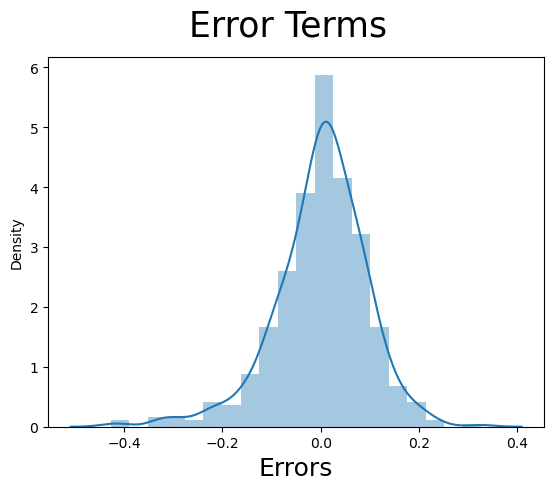

In [49]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 25)   
plt.xlabel('Errors', fontsize = 18)                   

#### Finding: In the above distplot we can see that the distribution of error is centered around zero which is a good thing.

## Homoscedasticity Test

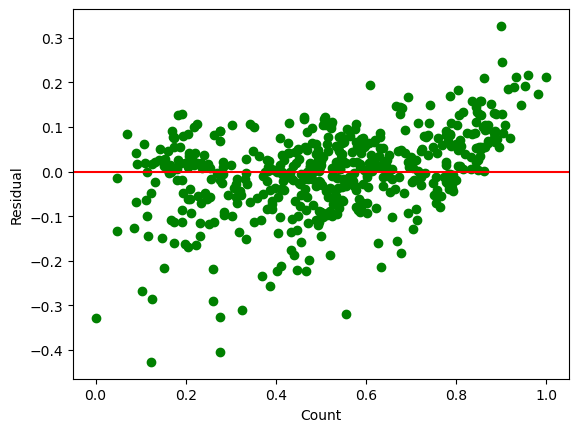

In [50]:
y_train_pred = lr7.predict(X_train_sm7)
residual = y_train - y_train_pred

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_train, residual, color='green')
ax.axhline(y=0, color='red', linestyle='-')
ax.set_xlabel('Count')
ax.set_ylabel('Residual')
plt.show()

#### Findings:
#### The purpose of this scatter plot is to visualize the residuals and check the quality of the fit of the linear regression model. The red line represents the ideal scenario where the residuals are exactly zero, meaning the

#### model perfectly fits the data.As we can see the residuals are randomly scatterd and there isn't and pattern formed which indicates a good fit of the model

# Making Predictions

In [51]:
# list of numeric variables
num_vars = ['temp','humidity','windspeed','count']
# Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_aug,month_dec,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weather_Light Snow/Rain,weather_Mist and Cloudy
22,0.046591,0.453529,0.462217,0.110907,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
468,0.543115,0.522511,0.347424,0.855729,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
553,0.951196,0.596104,0.212829,0.534975,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
504,0.699909,0.551083,0.478229,0.817648,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
353,0.407087,0.618615,0.080770,0.428900,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [52]:
df_test.describe()

,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_aug,month_dec,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weather_Light Snow/Rain,weather_Mist and Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.551225,0.662567,0.346706,0.518889,0.237443,0.264840,0.251142,0.493151,0.054795,0.105023,...,0.041096,0.146119,0.141553,0.136986,0.150685,0.123288,0.168950,0.689498,0.036530,0.324201
std,0.229463,0.143562,0.159553,0.219953,0.426491,0.442259,0.434663,0.501098,0.228100,0.307285,...,0.198967,0.354034,0.349389,0.344621,0.358561,0.329520,0.375566,0.463759,0.188034,0.469148
min,0.046591,0.301299,0.073090,0.055683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356479,0.553031,0.232689,0.364703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.557653,0.662338,0.328208,0.525771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.751309,0.762338,0.435708,0.676887,0.000000,1.000000,0.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,1.010390,0.824380,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
#Creating sets x and y 
y_test = df_test.pop('count')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temp                     219 non-null    float64
 1   humidity                 219 non-null    float64
 2   windspeed                219 non-null    float64
 3   season_spring            219 non-null    uint8  
 4   season_summer            219 non-null    uint8  
 5   season_winter            219 non-null    uint8  
 6   year_2019                219 non-null    uint8  
 7   month_aug                219 non-null    uint8  
 8   month_dec                219 non-null    uint8  
 9   month_feb                219 non-null    uint8  
 10  month_jan                219 non-null    uint8  
 11  month_jul                219 non-null    uint8  
 12  month_jun                219 non-null    uint8  
 13  month_mar                219 non-null    uint8  
 14  month_may                

In [54]:
X_train_sm7=X_train_sm7.drop(['const'], axis=1)
X_train_sm7.head()

,temp,windspeed,season_spring,season_winter,year_2019,month_mar,month_sep,weather_Light Snow/Rain,weather_Mist and Cloudy
483,0.497426,0.194850,0,0,1,0,0,0,0
650,0.416433,0.255118,0,1,1,0,0,0,0
212,0.887856,0.276919,0,0,0,0,0,0,0
714,0.378013,0.161523,0,1,1,0,0,0,1
8,0.098690,0.700017,1,0,0,0,0,0,0


In [55]:
# Now we can start making predictions using our final model

In [56]:
col1 = X_train_new.columns
X_test = X_test[col1]

In [57]:
# adding constant
X_test_sm7 = sm.add_constant(X_test)
X_test_sm7.head()

,const,temp,windspeed,season_spring,season_winter,year_2019,month_mar,month_sep,weather_Light Snow/Rain,weather_Mist and Cloudy
22,1.0,0.046591,0.462217,1,0,0,0,0,0,0
468,1.0,0.543115,0.347424,0,0,1,0,0,0,0
553,1.0,0.951196,0.212829,0,0,1,0,0,0,0
504,1.0,0.699909,0.478229,0,0,1,0,0,0,0
353,1.0,0.407087,0.080770,0,1,0,0,0,0,1


In [58]:
y_pred = lr7.predict(X_test_sm7)

# Model Evaluation

In [59]:
# checking R squared value for test
r2_score(y_test, y_pred)

0.8071356013645112

In [61]:
r1=r2_score(y_test, y_pred)
n = X_test.shape[0]
# Number of features
p = X_test.shape[1]

# Finding Adjusted R-squared
adjusted_r1 = 1-(1-r1)*(n-1)/(n-p-1)
adjusted_r1

0.7988304358730309

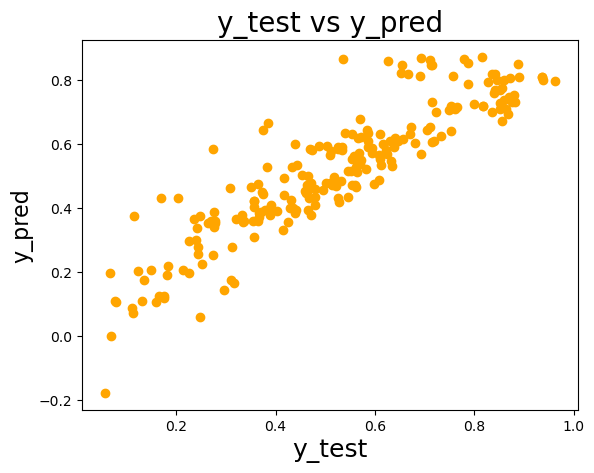

In [62]:
# Checking Spread of y_test and y_pred
plt.scatter(y_test, y_pred, color='orange')
plt.title("y_test vs y_pred", fontsize=20)
plt.xlabel("y_test", fontsize=18)
plt.ylabel("y_pred", fontsize=16)
plt.show()

#### Findings: In the the above figure points are densely clustered along a diagonal line, it indicates a good fit between the true target values and the predicted values, implying that the model has a good accuracy.

In [63]:
round(lr7.params,4)

const                      0.2618
temp                       0.4233
windspeed                 -0.1479
season_spring             -0.1255
season_winter              0.0492
year_2019                  0.2320
month_mar                  0.0619
month_sep                  0.0717
weather_Light Snow/Rain   -0.3136
weather_Mist and Cloudy   -0.0712
dtype: float64

#### We can see that the equation for best fitted line is:
#### count = 0.2618 + 0.4233 * temp - 0.1479 * windspeed - 0.1255 * season_spring + 0.0492 * season_winter + 0.2320 * year_2019 + 0.0619 * month_mar + 0.0717 * month_sep - 0.3136 * weather_Light Snow/Rain - 0.0712 * weather_Mist and Cloudy
#### The above linear regression equation models the relationship between a dependent variable "count" and other independent variables